In [115]:
##Import modules etc.
import skimage.io as io
io.use_plugin('tifffile')
import glob
import os
import time
import math
import pandas as pd
import numpy as np
import itertools
import mahotas as mh
from mahotas.labeled import filter_labeled
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from skimage.measure import regionprops
from skimage.morphology import watershed
from skimage.feature import peak_local_max
from skimage.morphology import remove_small_objects

from scipy import ndimage
from scipy.ndimage import morphology

from skimage.measure import find_contours

In [402]:
from skimage.measure import perimeter

In [2]:
#[1] Get targeted filelist
path='C:/Users/David Brown/Documents/Huang Lab/Exp0104_KDM5A_PHD2-fragments/PunctaByShell/'

target='_Puncta.npy'

filelist=glob.glob(path+str('*')+target)

In [3]:
filepath=filelist[1]

In [4]:
filename = os.path.basename(filepath) 

In [5]:
##Load Puncta mask
puncta = np.load(filepath)

In [6]:
z = 12
stackname= filename.replace('Puncta.npy', str('z'+str(z)))

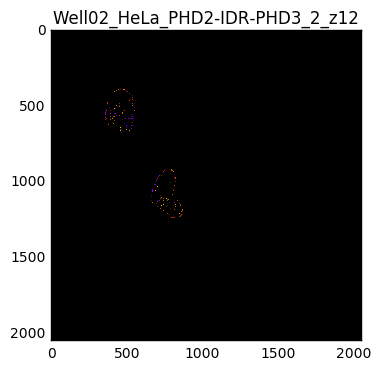

In [7]:
plt.imshow(puncta[z], cmap="gnuplot")
plt.title(stackname)

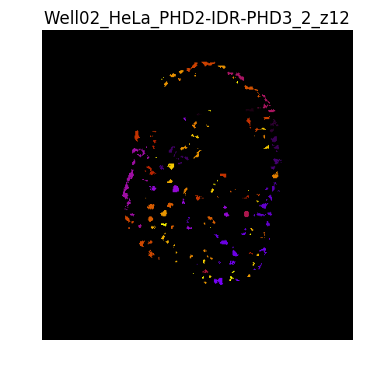

In [8]:
##Zoom in
plt.imshow(puncta[z, 350:750, 250:650], cmap="gnuplot")
plt.axis('off')
plt.title(stackname)

In [9]:
#load Hoechst and GFP stacks from .ome.tif files
def load_ome(ome_stack_file):

    #MMStack .ome.tif files load channel,z,y,x
    #Check file contains .ome.tif
    if '.ome.tif' in ome_stack_file:

        #Load the file
        im=io.imread(ome_stack_file)

        #Select Hoechst stack
        Hoechst_stack = im[0,:,:,:] #Hoechst Channel = 0
        GFP_stack = im[1,:,:,:]     #GFP Channel = 1
        
        #
        return [Hoechst_stack, GFP_stack]
        #return GFP_stack
        
    else:
        print 'this is not an ome.tif'

In [10]:
#Get targeted filelist
path='C:/Users/David Brown/Documents/Huang Lab/Exp0104_KDM5A_PHD2-fragments/'

target='.ome.tif'

filelist=glob.glob(path+str('*')+target)

#Load tif files
[Hoechst_stack, GFP_stack] = load_ome(filelist[1])

In [11]:
filelist[1]

'C:/Users/David Brown/Documents/Huang Lab/Exp0104_KDM5A_PHD2-fragments\\Well02_HeLa_PHD2-IDR-PHD3_2_MMStack_Pos0.ome.tif'

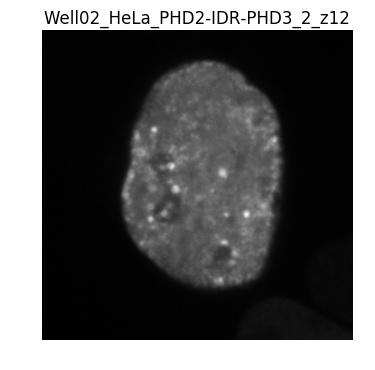

In [12]:
#Show zoomed intensity
plt.imshow(GFP_stack[z, 350:750, 250:650], cmap="gray")
plt.axis('off')
plt.title(stackname)

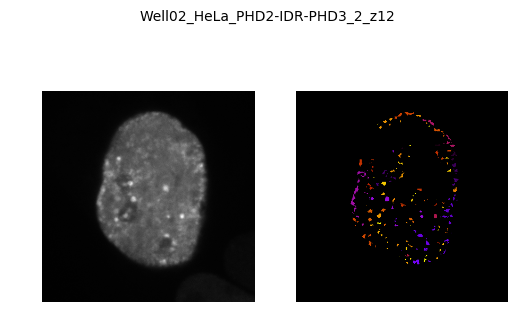

In [13]:
##Compare side by side
fig, ax = plt.subplots()
plt.subplot(1,2,1)
plt.imshow(GFP_stack[z, 350:750, 250:650], cmap="gray")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(puncta[z, 350:750, 250:650], cmap="gnuplot")
plt.axis('off')

plt.suptitle(stackname)

In [14]:
#Operate on z-stack
def stackOutlines(stack):
    
    outline_stack=[]

    #iterate through z-slices
    for z, frame in enumerate(stack):

        outlines=[]

        #iterate through objects
        for l in range(frame.max()):
            ll=l+1
            outlines.append(find_contours(frame==ll, 0.8))

        outline_stack.append(outlines)        
                
    return outline_stack

In [15]:
#Operate on a smaller ROI
ROI_Hoechst = Hoechst_stack[z, 350:750, 250:650]
ROI = GFP_stack[z, 350:750, 250:650]
ROI_puncta = puncta[z, 350:750, 250:650]

In [16]:
#relabel ROI_puncta
ROI_puncta, n_puncta = mh.labeled.relabel(ROI_puncta.astype(int), inplace=True)

In [17]:
outlines=[]

for l in range(ROI_puncta.max()):
    ll=l+1
    outlines.append(find_contours(ROI_puncta==ll, 0.2))

In [18]:
ROI_puncta.max()

104

In [19]:
outlines[2]

[array([[  57.8,  178. ],
        [  57. ,  177.2],
        [  56.8,  177. ],
        [  56. ,  176.2],
        [  55.8,  176. ],
        [  55. ,  175.2],
        [  54. ,  175.2],
        [  53.2,  176. ],
        [  53.2,  177. ],
        [  53. ,  177.2],
        [  52.2,  178. ],
        [  52.2,  179. ],
        [  52.2,  180. ],
        [  52.2,  181. ],
        [  53. ,  181.8],
        [  54. ,  181.8],
        [  54.8,  181. ],
        [  55. ,  180.8],
        [  55.8,  180. ],
        [  56. ,  179.8],
        [  56.8,  179. ],
        [  57. ,  178.8],
        [  57.8,  178. ]]), array([[  61.8,  169. ],
        [  61.8,  168. ],
        [  61.8,  167. ],
        [  61.8,  166. ],
        [  61. ,  165.2],
        [  60.8,  165. ],
        [  60. ,  164.2],
        [  59.8,  164. ],
        [  59. ,  163.2],
        [  58.2,  164. ],
        [  58. ,  164.2],
        [  57.2,  165. ],
        [  58. ,  165.8],
        [  58.2,  166. ],
        [  58. ,  166.2],
        [  

In [20]:
#Flatten a single z-slice
flattened_list  = list(itertools.chain(*outlines))

In [21]:
flattened_list[1][:,1]

array([ 192. ,  191. ,  190.2,  191. ,  191.2,  192. ,  192.2,  192.2,
        193. ,  193.2,  194. ,  194.2,  195. ,  195.2,  195.2,  196. ,
        197. ,  198. ,  199. ,  199.8,  199.8,  199. ,  198.8,  199. ,
        199.8,  199. ,  198.8,  198. ,  197.8,  197. ,  196.8,  196. ,
        195. ,  194. ,  193. ,  192.8,  192. ])

C:\Users\David Brown\Anaconda2\lib\site-packages\matplotlib\cbook.py:137: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


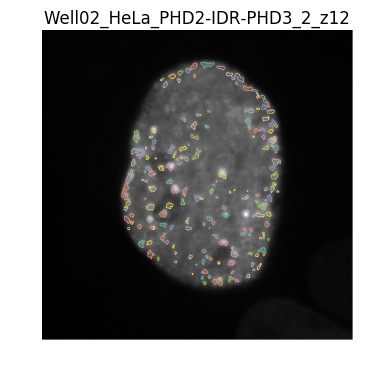

In [22]:
##Map onto GFP
fig, ax = plt.subplots()
ax.imshow(ROI, cmap='gray')
ax.axis('off')

#Set the color palette
ax.set_color_cycle(sns.color_palette("Set2", len(flattened_list)))

for n, line in enumerate(flattened_list):
    ax.plot(line[:, 1], line[:, 0], linewidth=0.5)
    
    #Careful setting these, as you can easily flip the y axis
    ax.set_xlim(0,len(ROI[0]))
    ax.set_ylim(len(ROI[1]),0)
    
plt.title(stackname)

In [23]:
##Colour by volume?!

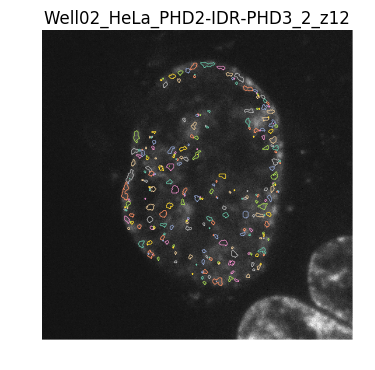

In [24]:
##Map onto Hoechst
fig, ax = plt.subplots()
ax.imshow(ROI_Hoechst, cmap='gray')
ax.axis('off')

#Set the color palette
ax.set_color_cycle(sns.color_palette("Set2", len(flattened_list)))

for n, line in enumerate(flattened_list):
    ax.plot(line[:, 1], line[:, 0], linewidth=0.5)
    
    #Careful setting these, as you can easily flip the y axis
    ax.set_xlim(0,len(ROI_Hoechst[0]))
    ax.set_ylim(len(ROI_Hoechst[1]),0)
    
plt.title(stackname)

In [25]:
##Load an example with Hollow Puncta

In [26]:
filelist[4]

'C:/Users/David Brown/Documents/Huang Lab/Exp0104_KDM5A_PHD2-fragments\\Well03_HeLa_PHD2-IDR-PHD3[W1625A]_3_MMStack_Pos0.ome.tif'

In [27]:
#Load tif files
[Hoechst_stack, GFP_stack] = load_ome(filelist[4])

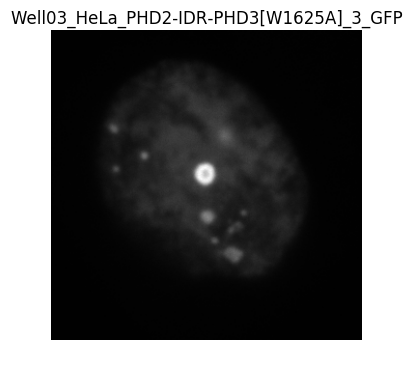

In [28]:
plt.imshow(GFP_stack[4, 1300:1600, 550:850], cmap="gray")
plt.axis('off')
plt.title('Well03_HeLa_PHD2-IDR-PHD3[W1625A]_3_GFP')

In [29]:
GFP_zoom = GFP_stack[:, 1300:1600, 550:850]
Hoechst_zoom = Hoechst_stack[:, 1300:1600, 550:850]

In [30]:
##Load puncta
punc_path='C:/Users/David Brown/Documents/Huang Lab/Exp0104_KDM5A_PHD2-fragments/PunctaByShell/'

target='_Puncta.npy'

punc_list=glob.glob(punc_path+str('*')+target)

In [31]:
punc_list[4]

'C:/Users/David Brown/Documents/Huang Lab/Exp0104_KDM5A_PHD2-fragments/PunctaByShell\\Well03_HeLa_PHD2-IDR-PHD3[W1625A]_3_Puncta.npy'

In [32]:
##Load Puncta mask
Well03_3_puncta = np.load(punc_list[4])

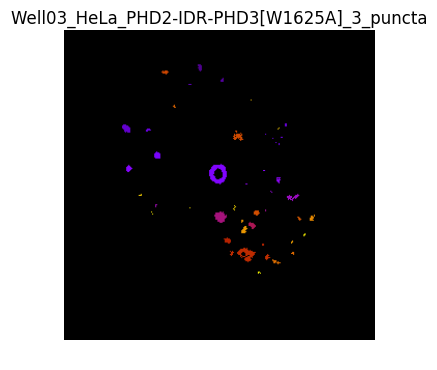

In [33]:
plt.imshow(Well03_3_puncta[4, 1300:1600, 550:850], cmap="gnuplot")
plt.axis('off')
plt.title('Well03_HeLa_PHD2-IDR-PHD3[W1625A]_3_puncta')

In [34]:
#Guess I never filled the puncta?!?
Punc_zoom=Well03_3_puncta[:, 1300:1600, 550:850].astype(int)

In [35]:
Punc_zoom, n_Punc = mh.labeled.relabel(Punc_zoom, inplace=True)

In [36]:
#Q: How does find_contours handle hollow objects?
#A: It will outline inside and out!

In [37]:
#Operate on z-stack
def stackOutlines(stack):
    
    outline_stack=[]

    #iterate through z-slices
    for z, frame in enumerate(stack):

        outlines=[]

        #iterate through objects
        for l in range(frame.max()):
            ll=l+1
            outlines.append(find_contours(frame==ll, 0.8))

        outline_stack.append(outlines)        
                
    return outline_stack

In [38]:
##Find outlines for each object
outline_stack = stackOutlines(Punc_zoom)

In [39]:
#Flatten a single z-slice
flattened_list  = list(itertools.chain(*outline_stack[z]))

In [40]:
z=5

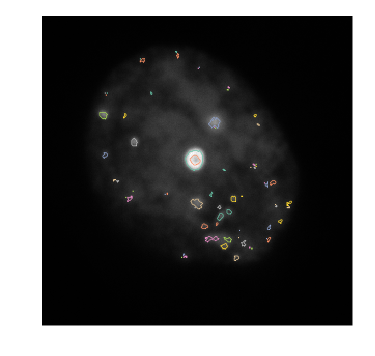

In [41]:
##Overlay Contours
fig, ax = plt.subplots()
#plt.figure(figsize=(5,5))
ax.imshow(GFP_zoom[z], interpolation='nearest', cmap=plt.cm.gray)
ax.axis('off')

ax.set_color_cycle(sns.color_palette("Set2", len(outline_stack[z])))

#Flatten a single z-slice
flattened_list  = list(itertools.chain(*outline_stack[z]))

#Plot contours
for n, line in enumerate(flattened_list):
    ax.plot(line[:, 1], line[:, 0], linewidth=0.5)
    ax.set_xlim(0,len(GFP_zoom[1]))
    ax.set_ylim(len(GFP_zoom[2]),0)

In [42]:
#Process Raw Puncta

In [43]:
Full_Punc = morphology.binary_fill_holes(Punc_zoom)

(-0.5, 299.5, 299.5, -0.5)

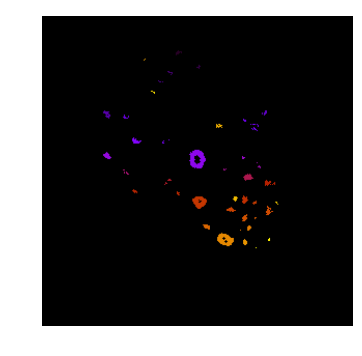

In [44]:
plt.imshow(Punc_zoom[2], cmap="gnuplot")
plt.axis('off')

In [45]:
#local threshold each frame in the stack
def fillholes3D(binary_stack):

    #Must be a 3D stack
    if len(binary_stack.shape)>2:
        mask=np.zeros_like(binary_stack)

        for z, frame in enumerate(binary_stack):
            #print(z)
            mask[z] = morphology.binary_fill_holes(frame)
        return mask     
    else:
        print 'Input is not a 3D stack'
        return morphology.binary_fill_holes(binary_stack)

In [46]:
Full_Punc = fillholes3D(Punc_zoom)

In [47]:
#label Filled mask
Full_Punc_Labeled, n_Punc = mh.label(Full_Punc)
n_Punc

162L

(-0.5, 299.5, 299.5, -0.5)

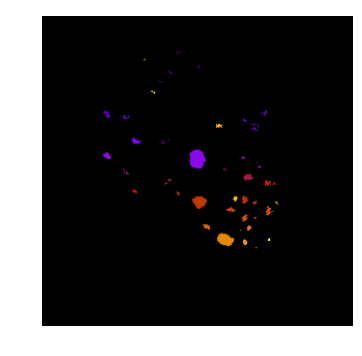

In [48]:
plt.imshow(Full_Punc_Labeled[2], cmap='gnuplot')
plt.axis('off')

(-0.5, 299.5, 299.5, -0.5)

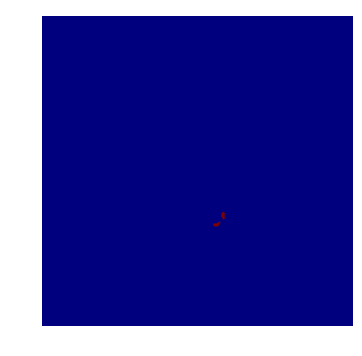

In [49]:
plt.imshow(Full_Punc_Labeled.max(axis=0)==45)
plt.axis('off')

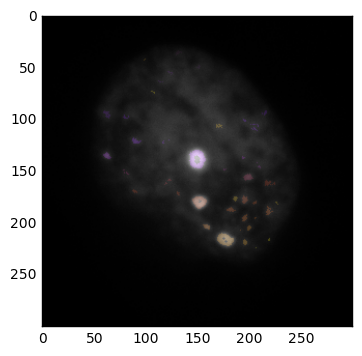

In [50]:
plt.imshow(GFP_zoom[2], cmap="gray")
plt.imshow(Punc_zoom[2], cmap="gnuplot", alpha=0.2)

In [51]:
from scipy.ndimage import distance_transform_edt

blob_dis = distance_transform_edt(Full_Punc_Labeled)

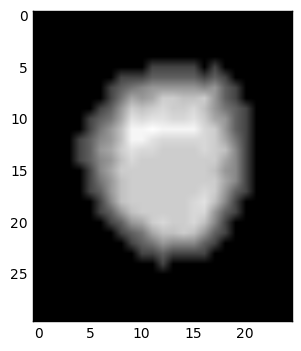

In [52]:
#plt.imshow(GFP_zoom[5, 125:155, 135:160], cmap="gray")
plt.imshow(blob_dis[5, 125:155, 135:160], cmap="gray") #3D distance transform is inappropriate as z-step is far greater than x/y-step

In [53]:
z_scale = 0.26 # µm per plane for 100x NIC confocal images
xy_scale = 0.065 # µm per pixel for 100x NIC confocal images

In [54]:
nu_blob_dis = distance_transform_edt(Full_Punc_Labeled, sampling=([z_scale, xy_scale, xy_scale]))

(<matplotlib.axes._subplots.AxesSubplot at 0x19aaf390>,
 (-0.5, 24.5, 29.5, -0.5))

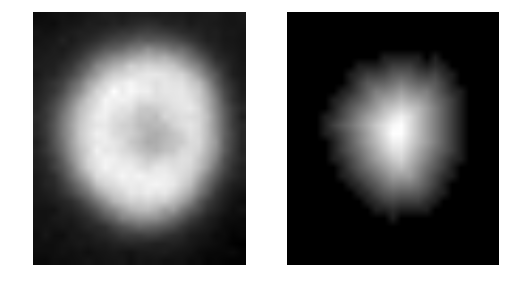

In [55]:
z=5
plt.subplot(1,2,1), plt.imshow(GFP_zoom[z, 125:155, 135:160], cmap="gray") #3D distance transform is inappropriate as z-step is far greater than x/y-step
plt.subplot(1,2,1), plt.axis('off')
plt.subplot(1,2,2), plt.imshow(nu_blob_dis[z, 125:155, 135:160], cmap="gray") #3D distance transform is inappropriate as z-step is far greater than x/y-step
plt.subplot(1,2,2), plt.axis('off')

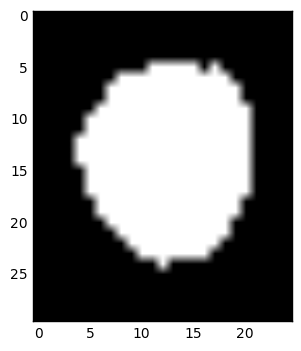

In [56]:
plt.imshow(Full_Punc_Labeled[z, 125:155, 135:160], cmap="gray")

(-0.5, 299.5, 299.5, -0.5)

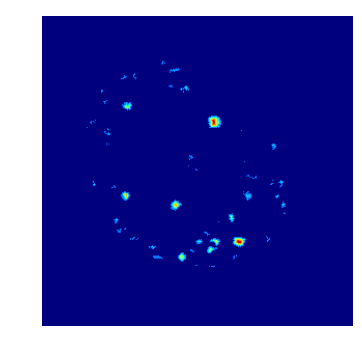

In [57]:
plt.imshow(blob_dis[10])
plt.axis('off')

In [58]:
from skimage.measure import perimeter

In [96]:
#Count voxels
voxels = mh.labeled.labeled_size(Full_Punc_Labeled)[1:] #ignore the first output which is for the background

#Count volume in um^3
volume = voxels*z_scale*(xy_scale**2)

#Generate labels
obj=range(1,len(voxels)+1)

Vol = pd.DataFrame()

Vol['Object'] = obj
Vol['Voxels'] = voxels
Vol['Volume (um^3)'] = volume

In [101]:
##Determine Volume 
def Volume(labeled_mask):
    
    voxels = mh.labeled.labeled_size(labeled_mask)[1:] #ignore the first output which is for the background

    #Count volume in um^3
    volume = voxels*z_scale*(xy_scale**2)

    #Generate labels
    obj=range(1,len(voxels)+1)

    Vol = pd.DataFrame()

    Vol['Object'] = obj
    Vol['Voxels'] = voxels
    Vol['Volume (um^3)'] = volume
      
    return Vol

In [100]:
Vol = Volume(Full_Punc_Labeled)

In [226]:
##Surface
def Surface(labeled_mask):
    
    surface=[]

#Iterate through labeled objects
    for obj in range(1,labeled_mask.max()+1):
        
        peri=[]
        z_diff=[]
        top_diff=[]
        
        blank=np.zeros((labeled_mask.shape[1], labeled_mask.shape[2])) #Assumes img is 3D.

        t=len(labeled_mask==obj)-1
        
        #Iterate through z-slices  
        for z, frame in enumerate(labeled_mask==obj):
                       
            #Approximate surface area per slice as perimeter * z_scale
            peri.append(perimeter(frame, neighbourhood=8))
            
            #What about the bottom?
            #Calculate xy_area of pixels gained or lost compared to previous frame
            z_diff.append(np.count_nonzero(np.logical_xor(frame,blank)))
                       
            #What about the top?
            #For the last frame, caluclate the upper xy_area
            if z == t:
                top=np.zeros_like(frame) 
                top_diff = np.count_nonzero(np.logical_xor(top, frame))
                
        #Total surface area 
        surface_pixels=sum(peri)+sum(z_diff)+top_diff
        surface_area=(sum(peri)*z_scale)+(sum(z_diff)+top_diff*xy_scale)
            
        surface.append([obj, surface_pixels, surface_area])
        
    return pd.DataFrame(surface, columns=['Object', 'Surface Pixels', 'Surface Area (um^2)'])

In [140]:
peri=[]
z_diff=[]
top_diff=[]

blank=np.zeros((Full_Punc_Labeled.shape[1], Full_Punc_Labeled.shape[2])) #Assumes img is 3D.

t=len(Full_Punc_Labeled==100)-1

#Iterate through z-slices  

for z, frame in enumerate(Full_Punc_Labeled==100):

    #Approximate surface area per slice as perimeter * z_scale
    peri.append(perimeter(frame, 8))

    #What about the bottom?
    #Calculate xy_area of pixels gained or lost compared to previous frame
    z_diff.append(np.count_nonzero(np.logical_xor(frame,blank)))

    #What about the top?
    #For the last frame, caluclate the upper xy_area
    if z == t:
        top=np.zeros_like(frame) 
        top_diff = np.count_nonzero(np.logical_xor(top, frame))

#Total surface area 
surface_pixels=sum(peri)+sum(z_diff)+top_diff
surface_area=(sum(peri)*z_scale)+(sum(z_diff)+top_diff*xy_scale)

In [154]:
peri

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 6.4142135623730949,
 0.0,
 0.0,
 8.2071067811865479,
 5.6568542494923806,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

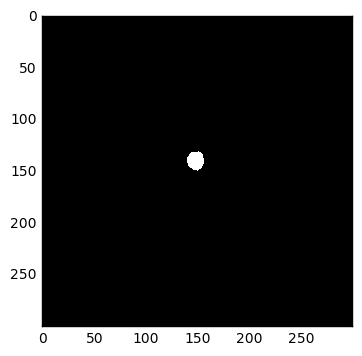

In [215]:
plt.imshow(Full_Punc_Labeled[4]==13, cmap='gray', interpolation='none')

In [220]:
perimeter(Full_Punc_Labeled[4]==13, 8)

68.414213562373092

In [221]:
r = regionprops((Full_Punc_Labeled[4]==13)*1)

In [222]:
len(r)

1

In [223]:
r[0].perimeter

58.284271247461902

In [183]:
Full_Punc_Labeled[14,70:80,70:80]==100

array([[False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False,  True, False, False,
        False],
       [False, False, False, False, False, False, False,  True, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False]], dtype=bool)

In [227]:
Surf = Surface(Full_Punc_Labeled)

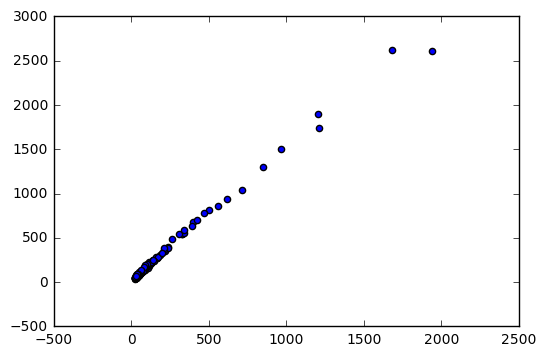

In [228]:
plt.scatter(Vol['Voxels'], Surf['Surface Pixels'])

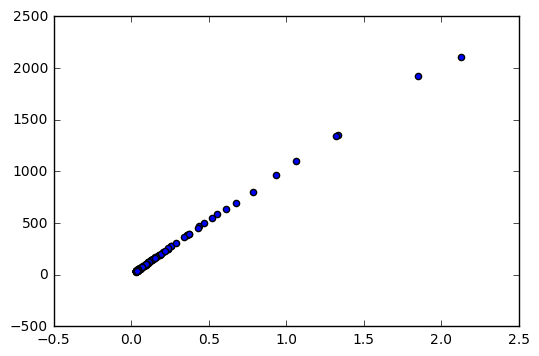

In [229]:
plt.scatter(Vol['Volume (um^3)'], Surf['Surface Area (um^2)'])

In [128]:
##Check circularity
props = regionprops(Full_Punc_Labeled)

for p in punc_props:
    
    #Get Volumes
    volume =  p.area,
    
    #Get Surface Areas

        props.append([int(p.label)
                      
                      p.area,
                      
                      
                      p.mean_intensity,
                      p.mean_intensity * p.area])

#Get Surface Areas


#Get Volumes


#Calculate Sphericity
sph = (math.pi ** (1. / 3) * (6*p.area) ** (2./3)) /  

# allAreas = [props.Area]
# allPerimeters = [props.Perimeter];
# circularities = (4 * pi * allAreas) ./ allPerimeters .^2;

IndentationError: unexpected indent (<ipython-input-128-84f1027197a9>, line 11)

In [ ]:
##Plot Correlation between intensity image and distance transform
# from scipy.signal import correlate

# cor = correlate(GFP_zoom, blob_dis)

In [30]:
from scipy.stats import spearmanr
#Data are not normaly distribution, as there will always be more distance 1 pixels than higher distances

(<matplotlib.axes._subplots.AxesSubplot at 0x3ba6c668>,
 [<matplotlib.lines.Line2D at 0x3ad0a208>])

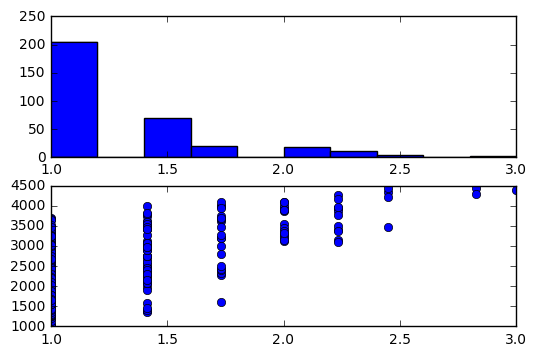

In [104]:
##For a given object correlate distance and intensity
   
#List distance values
dist_list = blob_dis[Full_Punc_Labeled==5]

#List GFP values
I_list = GFP_zoom[Full_Punc_Labeled==5]

#Caluclate correlation
[rho, p] = spearmanr(dist_list, I_list)

plt.subplot(211), plt.hist(dist_list) 
plt.subplot(212), plt.plot(dist_list, I_list, 'bo')        

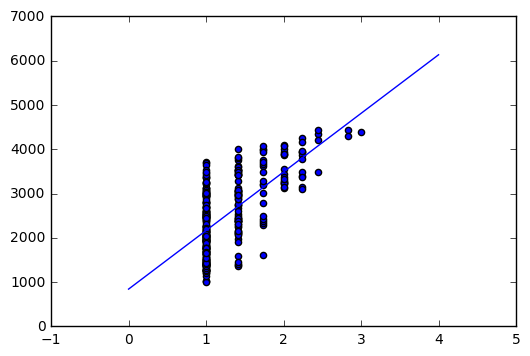

In [106]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(dist_list[:, np.newaxis], I_list)

xfit = np.linspace(0, 4, 100)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(dist_list, I_list)
plt.plot(xfit, yfit);

In [381]:
np.count_nonzero(dist_list==xy_scale)

39

In [230]:
balls = pd.merge(Vol, Surf)

In [231]:
balls['Sphericity'] = (math.pi ** (1. / 3) * (6*balls['Voxels']) ** (2./3)) / balls['Surface Pixels']

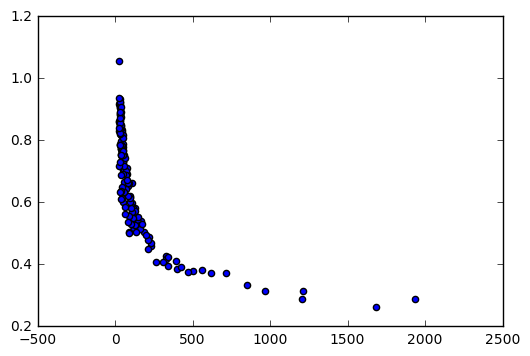

In [232]:
plt.scatter(balls['Voxels'], balls['Sphericity'])

In [132]:
balls['Sphericity'].max()

0.92058932336277011

In [122]:
balls[balls['Sphericity']==balls['Sphericity'].max()].index

Int64Index([99], dtype='int64')

In [123]:
balls[balls['Sphericity']==balls['Sphericity'].max()]

,Object,Voxels,Volume (um^3),Surface Pixels,Surface Area (um^2),Sphericity
99,100,27,0.02966,47.278175,32.272325,0.920589


In [395]:
##Determine volume and surface area
def Sphericity(labeled_mask):
    
    sphericity=[]

    #Get volume
    
        
        #Approximate surface area
        surface_pix = np.count_nonzero(dist_list==xy_scale)
        
        #OR
        #Approximate surface area as perimeter length in each z-slice * z_scale
        
        ##Prepare Output
        sphericity.append([obj, voxels, volume, surface_pix])
       
    return pd.DataFrame(sphericity, columns=['Object', 'Voxels', 'Volume (um^3)', 'Surface Pixels'])

In [71]:
##For each object correlate distance and intensity
def isHollow(intensity_image, distance_image, labeled_mask):

    hollowness=[]
    
    #Iterate through labeled objects
    for obj in range(1,labeled_mask.max()+1):
        
        #List distance values
        dist_list = distance_image[labeled_mask==obj]

        #List GFP values
        I_list = intensity_image[labeled_mask==obj]

        #Caluclate correlation
        [rho, p] = spearmanr(dist_list, I_list)
        
        hollowness.append([obj, len(dist_list), rho, p])
       
    return pd.DataFrame(hollowness, columns=['Object', 'Volume', 'Correlation Coefficient (Spearman)', 'pvalue'])

In [72]:
Hollowness = isHollow(GFP_zoom, blob_dis, Full_Punc_Labeled)

In [73]:
Hollowness[Hollowness['Correlation Coefficient (Spearman)']<0]

,Object,Volume,Correlation Coefficient (Spearman),pvalue
1,2,34,-0.115334,0.516000
7,8,27,-0.214054,0.283668
17,18,32,-0.165345,0.365801
19,20,39,-0.057667,0.727313
22,23,33,-0.087795,0.627081
38,39,35,-0.025473,0.884512
41,42,31,-0.204124,0.270697
42,43,49,-0.163303,0.262219
45,46,30,-0.118024,0.534498
67,68,100,-0.048507,0.631761


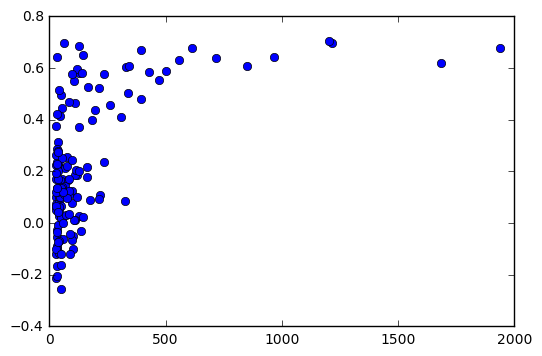

In [75]:
plt.plot('Volume', 'Correlation Coefficient (Spearman)', 'bo', data=Hollowness)

(-0.5, 299.5, 299.5, -0.5)

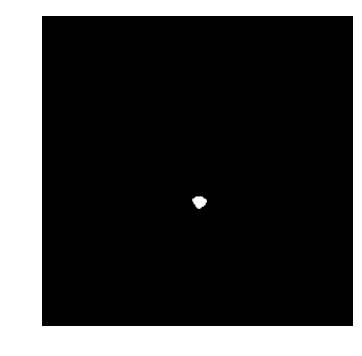

In [277]:
plt.imshow(Full_Punc_Labeled[2]==25, cmap='gray')
plt.axis('off')

(array([  1.89640000e+04,   9.80000000e+02,   1.84200000e+03,
          7.40000000e+02,   6.46000000e+02,   2.57000000e+02,
          1.98000000e+02,   3.90000000e+01,   2.40000000e+01,
          8.00000000e+00]),
 array([ 1.        ,  1.48309519,  1.96619038,  2.44928557,  2.93238076,
         3.41547595,  3.89857114,  4.38166633,  4.86476152,  5.34785671,
         5.83095189]),
 <a list of 10 Patch objects>)

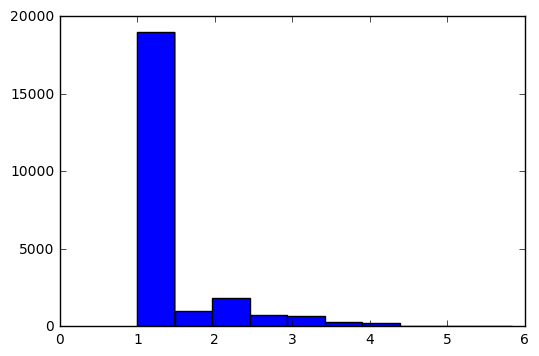

In [82]:
##Try inner vs outer
plt.hist(list(blob_dis[blob_dis>0]), bins=10)

In [ ]:
##Try with scaled distance transform

In [374]:
##For a given object correlate distance and intensity
   
#List distance values
dist_list = nu_blob_dis[Full_Punc_Labeled==3]

#List GFP values
I_list = GFP_zoom[Full_Punc_Labeled==3]

#Caluclate correlation
[rho, p] = spearmanr(dist_list, I_list)

In [375]:
# calculate the total sum of squares
TSS = np.square(I_list-I_list.mean()).sum()
print TSS

# calculate polynomial
#q = np.polyfit(dist_list, I_list, 2)
q, res, _, _, _ = np.polyfit(dist_list, I_list, 3, full=True)
f = np.poly1d(q)

print res[0]

# calculate new x's and y's
x_new = np.linspace(dist_list.min(), dist_list.max(), 50)
y_new = f(x_new)

# calculate R2
R2 = 1-(res[0]/TSS)

379429.560976


IndexError: index 0 is out of bounds for axis 0 with size 0

In [368]:
# calulate coefficients
print(f)

            3        2
-2.586e+05 x - 4766 x + 8184 x + 1266


0.272809833778


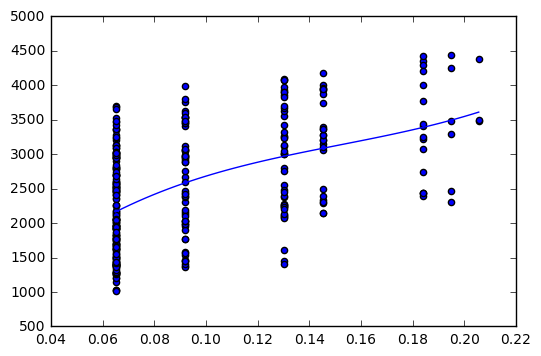

In [362]:
plt.scatter(dist_list, I_list)
plt.plot(x_new, y_new);
print R2

In [ ]:
##Splines are inappropriate here as x is not monotonically increasing

# from scipy import interpolate

# tck = interpolate.splrep(dist_list, I_list)

# ynew = interpolate.splev(x_new, tck, der=0)

In [386]:
xy_scale

0.065

In [383]:
from skimage.measure import marching_cubes
#marching_cubes_lewiner(volume, level=None, spacing=(1.0, 1.0, 1.0), gradient_direction='descent', step_size=1, allow_degenerate=True, use_classic=False)

In [385]:
[verts, faces, normals, values] = marching_cubes(Full_Punc_Labeled==25, level=1, spacing=(z_scale, xy_scale, xy_scale))

IndexError: arrays used as indices must be of integer (or boolean) type

In [ ]:
skimage.measure.mesh_surface_area(verts, faces)